# Father Goriot

#Text extraction and Preprocessing

In [128]:
#Necessary imports
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.probability import FreqDist
import re
#extract text
url='https://www.gutenberg.org/files/1237/1237-0.txt'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
text = soup.get_text()

print(text[:1000])



The Project Gutenberg EBook of Father Goriot, by Honore de Balzac

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Father Goriot

Author: Honore de Balzac

Translator: Ellen Marriage

Release Date: March, 1998  [Etext #1237]
Posting Date: February 22, 2010
Last Updated: November 22, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK FATHER GORIOT ***




Produced by Dagny





FATHER GORIOT


By Honore De Balzac



Translated by Ellen Marriage




     To the great and illustrious Geoffroy Saint-Hilaire, a token
     of admiration for his works and genius.
                                                      DE BALZAC.





FATHER GORIOT


Mme. Vauquer (_nee_ de Conflans) is an


In [129]:
#preprocessing 
def remove_header(text):
    start_phrase = "Produced by Dagny"
    start_index = text.find(start_phrase)
    if start_index != -1:
        content = text[start_index + len(start_phrase):]
        return content.strip()
    else:
        return text.strip()
text=remove_header(text)
text[:1000]
##delete also the last part of the book

'FATHER GORIOT\r\n\r\n\r\nBy Honore De Balzac\r\n\r\n\r\n\r\nTranslated by Ellen Marriage\r\n\r\n\r\n\r\n\r\n     To the great and illustrious Geoffroy Saint-Hilaire, a token\r\n     of admiration for his works and genius.\r\n                                                      DE BALZAC.\r\n\r\n\r\n\r\n\r\n\r\nFATHER GORIOT\r\n\r\n\r\nMme. Vauquer (_nee_ de Conflans) is an elderly person, who for the past\r\nforty years has kept a lodging-house in the Rue Nueve-Sainte-Genevieve,\r\nin the district that lies between the Latin Quarter and the Faubourg\r\nSaint-Marcel. Her house (known in the neighborhood as the _Maison\r\nVauquer_) receives men and women, old and young, and no word has ever\r\nbeen breathed against her respectable establishment; but, at the same\r\ntime, it must be said that as a matter of fact no young woman has been\r\nunder her roof for thirty years, and that if a young man stays there for\r\nany length of time it is a sure sign that his allowance must be of the\r\n

In [130]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def prep(text):
    text = text.replace('\n', ' ')
    text = re.sub(' +', ' ', text)
    text = text.replace('\r', '')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stopword_list = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(filtered_tokens)
    return text
text=prep(text)   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
text[:1000]

'FATHER GORIOT Honore De Balzac Translated Ellen Marriage great illustrious Geoffroy Saint-Hilaire, token admiration works genius. DE BALZAC. FATHER GORIOT Mme. Vauquer (_nee_ de Conflans) elderly person, past forty years kept lodging-house Rue Nueve-Sainte-Genevieve, district lies Latin Quarter Faubourg Saint-Marcel. house (known neighborhood _Maison Vauquer_) receives men women, old young, word ever breathed respectable establishment; but, time, must said matter fact young woman roof thirty years, young man stays length time sure sign allowance must slenderest. , however, time drama opens, almost penniless young girl among Mme. Vauquer’s boarders. word drama somewhat discredited late; overworked twisted strange uses days dolorous literature; must service here, story dramatic restricted sense word, tears may perhaps shed _intra et extra muros_ over. one without walls Paris understand it? open doubt. audience could appreciate results close observation, careful reproduction minute detai

In [131]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()
sentences = sent_tokenize(text)    #the sentences later have to keep only the lemmatized_tokens
#tokenizer = RegexpTokenizer(r"\w+(?:['’]\w+)*")   #keep apostrophes
##tokenizer = RegexpTokenizer(r"\b(?:[^\d\W]+(?:['’][^\d\W]+)*)\b")
   #keep apostrophes and remove numbers..
#try another tokenizer to remove apostrophes 
tokenizer=RegexpTokenizer(r"\b(?:[^\d\W']+)\b")
tokens = []
for sentence in sentences:
    sentence_tokens = tokenizer.tokenize(sentence)
    tokens.extend(sentence_tokens)

tagged_sentences = nltk.pos_tag_sents([tokenizer.tokenize(sentence) for sentence in sentences])

lemmatized_tokens = []
for tagged_sentence in tagged_sentences:
    for token, tag in tagged_sentence:
        if tag.startswith('N'):
            # Lemmatize nouns
            lemma = lemmatizer.lemmatize(token, pos='n')
        elif tag.startswith('V'):
            # Lemmatize verbs
            lemma = lemmatizer.lemmatize(token, pos='v')
        elif tag.startswith('J'):
            # Lemmatize adjectives
            lemma = lemmatizer.lemmatize(token, pos='a')
        else:
            # Keep other tokens as they are
            lemma = token
        lemmatized_tokens.append(lemma)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [132]:
sentences[:5]  

['FATHER GORIOT Honore De Balzac Translated Ellen Marriage great illustrious Geoffroy Saint-Hilaire, token admiration works genius.',
 'DE BALZAC.',
 'FATHER GORIOT Mme.',
 'Vauquer (_nee_ de Conflans) elderly person, past forty years kept lodging-house Rue Nueve-Sainte-Genevieve, district lies Latin Quarter Faubourg Saint-Marcel.',
 'house (known neighborhood _Maison Vauquer_) receives men women, old young, word ever breathed respectable establishment; but, time, must said matter fact young woman roof thirty years, young man stays length time sure sign allowance must slenderest.']

In [133]:
tokens[:10]

['FATHER',
 'GORIOT',
 'Honore',
 'De',
 'Balzac',
 'Translated',
 'Ellen',
 'Marriage',
 'great',
 'illustrious']

In [134]:
lemmatized_tokens[:40]   #can remove now special characters from these words

['FATHER',
 'GORIOT',
 'Honore',
 'De',
 'Balzac',
 'Translated',
 'Ellen',
 'Marriage',
 'great',
 'illustrious',
 'Geoffroy',
 'Saint',
 'Hilaire',
 'token',
 'admiration',
 'work',
 'genius',
 'DE',
 'BALZAC',
 'FATHER',
 'GORIOT',
 'Mme',
 'Vauquer',
 '_nee_',
 'de',
 'Conflans',
 'elderly',
 'person',
 'past',
 'forty',
 'year',
 'keep',
 'lodge',
 'house',
 'Rue',
 'Nueve',
 'Sainte',
 'Genevieve',
 'district',
 'lie']

In [135]:
#remove stopwords    case sensitive so change everything to lower case ..already done in text
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.lower() not in stop_words]
##maybe some stopwords dont have to be deleted such as  "in," "on," "to" ,stopwords that maybe indicade location etc.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
lemmatized_tokens= [token for token in lemmatized_tokens if token.lower() not in stop_words]

In [137]:
# delete  words with one or two characters
lemmatized_tokens = [word for word in lemmatized_tokens if len(word) > 2]
lemmatized_tokens[90:160]

['drama',
 'somewhat',
 'discredit',
 'late',
 'overwork',
 'twisted',
 'strange',
 'day',
 'dolorous',
 'literature',
 'must',
 'service',
 'story',
 'dramatic',
 'restrict',
 'sense',
 'word',
 'tear',
 'may',
 'perhaps',
 'shed',
 '_intra',
 'extra',
 'muros_',
 'one',
 'without',
 'wall',
 'Paris',
 'understand',
 'open',
 'doubt',
 'audience',
 'could',
 'appreciate',
 'result',
 'close',
 'observation',
 'careful',
 'reproduction',
 'minute',
 'detail',
 'local',
 'color',
 'dweller',
 'height',
 'Montrouge',
 'Montmartre',
 'vale',
 'crumble',
 'stucco',
 'water',
 'streams',
 'black',
 'mud',
 'vale',
 'sorrow',
 'real',
 'joy',
 'often',
 'hollow',
 'audience',
 'accustom',
 'terrible',
 'sensation',
 'unimaginable',
 'well',
 'neigh',
 'impossible',
 'woe',
 'could']

In [138]:
#remove special characters..
import re
def remove_special_characters(tokens):
    pattern = r'[^a-zA-Z0-9\s]'        
    lemmatized_tokens = []
    for token in tokens:
        cleaned_token = re.sub(pattern, '', token)
        lemmatized_tokens.append(cleaned_token)
    
    return lemmatized_tokens
lemmatized_tokenes=remove_special_characters(lemmatized_tokens)

In [139]:
lemmatized_tokens[90:120]

['drama',
 'somewhat',
 'discredit',
 'late',
 'overwork',
 'twisted',
 'strange',
 'day',
 'dolorous',
 'literature',
 'must',
 'service',
 'story',
 'dramatic',
 'restrict',
 'sense',
 'word',
 'tear',
 'may',
 'perhaps',
 'shed',
 '_intra',
 'extra',
 'muros_',
 'one',
 'without',
 'wall',
 'Paris',
 'understand',
 'open']

In [140]:
tokens[:10]

['FATHER',
 'GORIOT',
 'Honore',
 'De',
 'Balzac',
 'Translated',
 'Ellen',
 'Marriage',
 'great',
 'illustrious']

In [141]:
filtered_sentences = []

for sentence in sentences:
    words = word_tokenize(sentence)
    
    if any(word in lemmatized_tokens for word in words):
        filtered_sentences.append(sentence)
###so now i will need in some place to delete the '.'

In [118]:
filtered_sentences[:2]

['FATHER GORIOT Honore De Balzac Translated Ellen Marriage great illustrious Geoffroy Saint-Hilaire, token admiration works genius.',
 'DE BALZAC.']

<FreqDist with 9507 samples and 51473 outcomes>
[('said', 650), ('de', 451), ('Eugene', 444), ('Mme', 411), ('would', 349), ('man', 332), ('one', 332), ('Goriot', 294), ('like', 271), ('see', 214), ('Rastignac', 213), ('go', 200), ('old', 197), ('Vautrin', 197), ('father', 197), ('two', 194), ('went', 189), ('must', 187), ('know', 179), ('Vauquer', 170), ('shall', 170), ('could', 169), ('good', 161), ('young', 159), ('come', 159), ('room', 156), ('made', 156), ('time', 155), ('little', 150), ('love', 149), ('house', 148), ('life', 147), ('francs', 143), ('Father', 142), ('eyes', 142), ('money', 135), ('student', 134), ('make', 134), ('cried', 131), ('woman', 129), ('us', 127), ('well', 125), ('nothing', 123), ('way', 119), ('came', 119), ('heart', 118), ('Paris', 116), ('Nucingen', 115), ('Oh', 114), ('back', 111)]


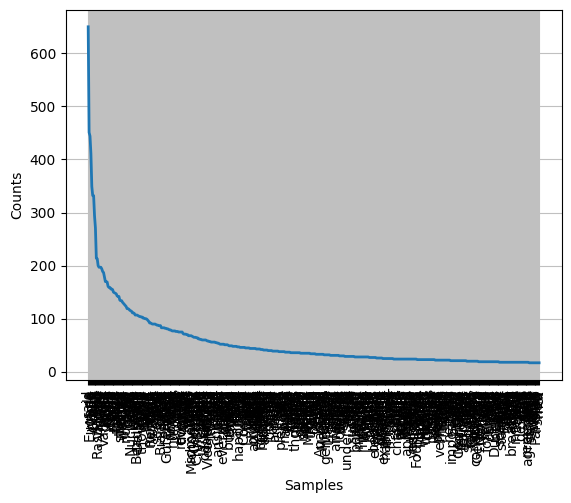

<Axes: xlabel='Samples', ylabel='Counts'>

In [142]:
#longtail of words
freq_dist = nltk.FreqDist(tokens)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(500)

In [ ]:
#to adress the problem of french words in my english text i could either use multilingual bert which is a language
# independent model or to translate the french words into english ones


In [ ]:
!pip install --upgrade googletrans==4.0.0-rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=6650f7ab9d8a1a82d4441818383567189838d0d61b013399a7c50593dbc47fd3
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [ ]:
#!pip install googletrans
from googletrans import Translator    #this method fails because actually also google translator fails to correctly identify the language of the separated words.

translator = Translator(service_urls=['translate.google.com'])

# Example tokens with French words
example = ['de', 'monde', 'Hello', 'Bonjour', 'Python', 'au', 'chat']

translated_tokens = []
for token in example:
    if token.isalpha() and token.islower() and translator.detect(token).lang == 'fr':
        translation = translator.translate(token, src='fr', dest='en').text
        translated_tokens.append(translation)
    else:
        translated_tokens.append(token)

print(translated_tokens)
#try this method in the whole text ???

['de', 'monde', 'Hello', 'Bonjour', 'Python', 'au', 'chat']


In [ ]:
translator.detect('Bonjour').lang

'en'

In [ ]:
!pip install transformers

## WordCloud

FATHER GORIOT Honore Balzac Translated Ellen Marriage great illustrious Geoffroy Saint Hilaire token


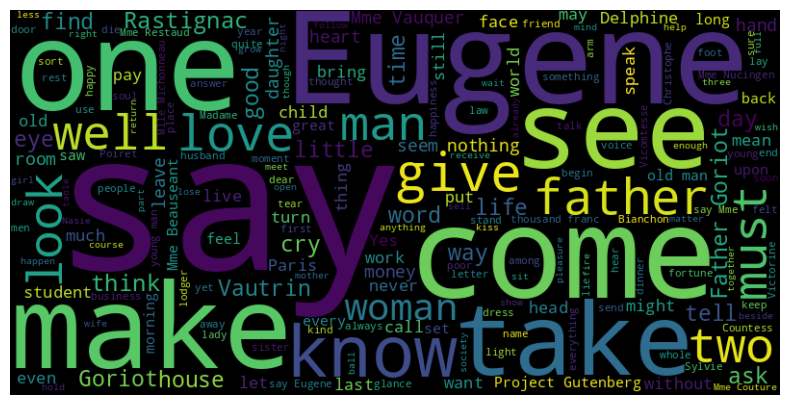

In [143]:
#wORDcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for token in lemmatized_tokens:
  lemma_text = ' '.join(lemmatized_tokens)

print(lemma_text[:100])

wordcloud = WordCloud(width=800, height=400).generate(lemma_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
##we observe that most of the most frequent words dont provide any meaningful information for the topics of the book.
#need to remove very frequent and rare words 
#create n grams
#tf-idf

In [ ]:
#can i delete also the word 'Mme' and 'de' and 'Mlle' or create patterns for the NER later???how to handle the french titles of names etc..?
#bigrams could help with the right preprocessing

In [144]:
lemmatized_tokens = [token for token in lemmatized_tokens if token not in ['Project', 'Gutenberg','say','de','Mme','say','come','go','one','see','two','know','take','ebook','Ebook','project','gutenberg,']]


In [145]:
lemmatized_tokens = [token for token in lemmatized_tokens if len(token) > 2]

### Bigrams

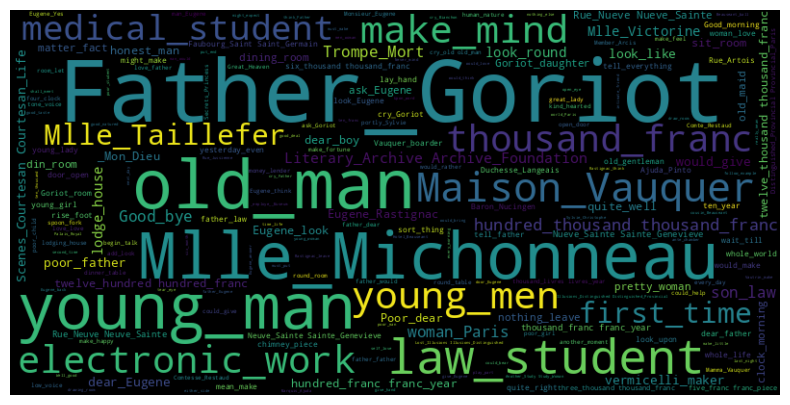

In [146]:
from nltk import bigrams
bigram_tokens = list(bigrams(lemmatized_tokens))

# Create a string of bigrams
bigram_text = ' '.join(['_'.join(bigram) for bigram in bigram_tokens])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(bigram_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#sos bigrams such as poor father and also names so for named entity try also bigrams


In [147]:
tf_scores = nltk.FreqDist(lemmatized_tokens)
most_frequent_words = tf_scores.most_common(500)
for word, count in most_frequent_words:
    print(f"Word: {word}, Count: {count}")    
#now in the most frequent words there are also named entities so we have to be careful when deleting words.
#SOS frequent words:money poor family father daugher death kill love tear cry brother fear pain power lover mother wife husband child  

Word: Eugene, Count: 444
Word: would, Count: 349
Word: man, Count: 332
Word: make, Count: 332
Word: Goriot, Count: 294
Word: like, Count: 277
Word: give, Count: 230
Word: Rastignac, Count: 213
Word: woman, Count: 207
Word: father, Count: 205
Word: old, Count: 204
Word: look, Count: 203
Word: love, Count: 203
Word: Vautrin, Count: 197
Word: must, Count: 187
Word: room, Count: 186
Word: time, Count: 179
Word: good, Count: 173
Word: think, Count: 173
Word: house, Count: 171
Word: Vauquer, Count: 170
Word: shall, Count: 170
Word: could, Count: 169
Word: young, Count: 166
Word: day, Count: 159
Word: life, Count: 158
Word: franc, Count: 152
Word: ask, Count: 151
Word: little, Count: 150
Word: eye, Count: 149
Word: student, Count: 148
Word: word, Count: 143
Word: cry, Count: 143
Word: Father, Count: 142
Word: leave, Count: 141
Word: tell, Count: 140
Word: find, Count: 138
Word: money, Count: 135
Word: hand, Count: 133
Word: way, Count: 133
Word: heart, Count: 132
Word: well, Count: 125
Word: 

## tf-idf

In [148]:
#TF-IDF to find meaningful words based on their frequency in the text and rarity in the corpus
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([text])

feature_names = vectorizer.get_feature_names_out()

tfidf_values = tfidf_matrix.toarray()[0]

# Create a dictionary of word-to-TFIDF mapping
word_tfidf = dict(zip(feature_names, tfidf_values))

# Sort the words by their TF-IDF values in descending order
sorted_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)

# Print the top  meaningful words based on TF-IDF
top_words = sorted_words[:40]
for word, tfidf in top_words:
    print(f"{word}: {tfidf}")


said: 0.31186159809186903
de: 0.2197424798862708
eugene: 0.2130254608504459
mme: 0.19719248740885872
you: 0.1890361071510714
would: 0.16888505004359677
one: 0.1674456888216343
father: 0.16408717930372185
man: 0.1607286697858094
goriot: 0.14249676097428476
it: 0.13817867730839736
like: 0.13146165827257247
me: 0.11802762020092274
him: 0.10891166579516041
see: 0.10411379505528551
rastignac: 0.10267443383332303
go: 0.10171485968534805
two: 0.10027549846338557
well: 0.09643720187148565
old: 0.09595741479749816
come: 0.0945180535755357
vautrin: 0.0945180535755357
good: 0.09355847942756071
went: 0.09067975698363576
must: 0.09019996990964826
know: 0.08588188624376085
shall: 0.08252337672584842
vauquer: 0.08252337672584842
could: 0.08156380257787343
young: 0.078205293059961
life: 0.07676593183799853
made: 0.07484678354204856
room: 0.07484678354204856
time: 0.07436699646806108
love: 0.07388720939407359
little: 0.07244784817211111
house: 0.07100848695014864
francs: 0.06860955158021119
eyes: 0.068

### Boxplot of words with the highest scores

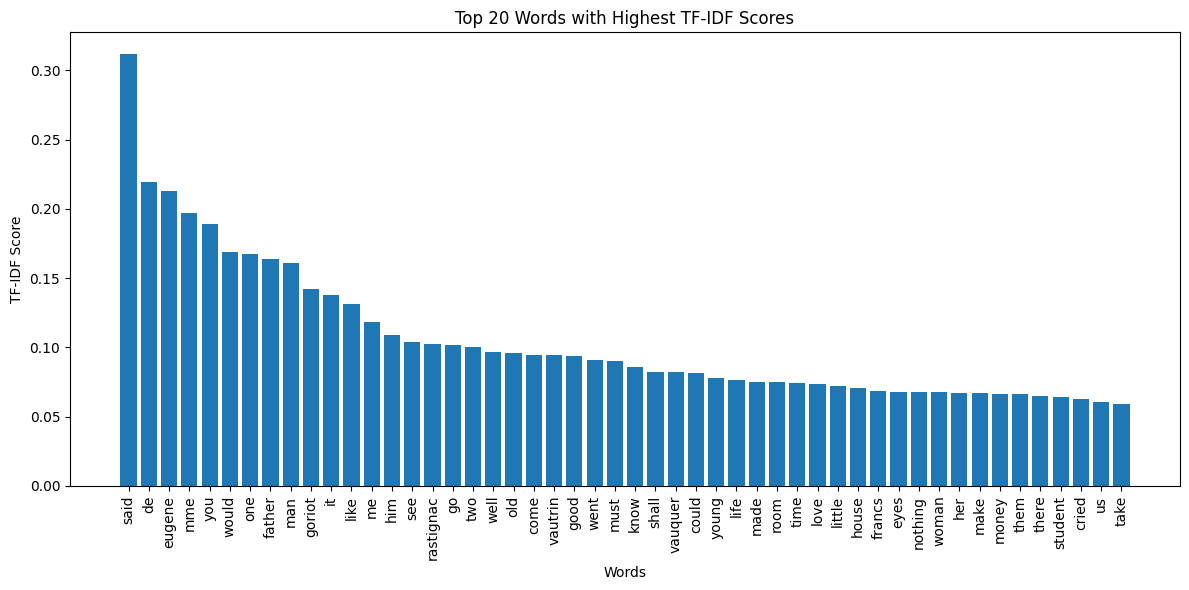

In [149]:
import matplotlib.pyplot as plt

# Extract the top 20 words and their TF-IDF scores
top_words = sorted_words[:50]
words = [word for word, _ in top_words]
tfidf_scores = [tfidf for _, tfidf in top_words]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, tfidf_scores)
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Words with Highest TF-IDF Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [150]:
#tf-idf idf using bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

tfidf_matrix = vectorizer.fit_transform([text])

feature_names = vectorizer.get_feature_names_out()

tfidf_values = tfidf_matrix.toarray()[0]

bigram_tfidf = dict(zip(feature_names, tfidf_values))

sorted_bigrams = sorted(bigram_tfidf.items(), key=lambda x: x[1], reverse=True)

top_bigrams = sorted_bigrams[:30]
for bigram, tfidf in top_bigrams:
    print(f"{bigram}: {tfidf}")


mme de: 0.431285420973836
father goriot: 0.28083701830854435
mme vauquer: 0.26679516739311715
de beauseant: 0.19658591281598106
de nucingen: 0.18655601930496163
project gutenberg: 0.16850221098512663
de restaud: 0.16649623228292273
old man: 0.15044840266529164
thousand francs: 0.14844242396308774
said eugene: 0.13239459434545664
mlle michonneau: 0.12437067953664108
gutenberg tm: 0.11434078602562164
said mme: 0.11233480732341775
young man: 0.11032882862121386
mme couture: 0.09026904159917498
let us: 0.07622719068374775
to morrow: 0.07221523327933999
hundred francs: 0.06619729717272832
every one: 0.06218533976832054
said vautrin: 0.060179361066116654
de rastignac: 0.058173382363912764
law student: 0.058173382363912764
went on: 0.05616740366170887
to day: 0.05416142495950499
maison vauquer: 0.05014946755509721
said rastignac: 0.048143488852893324
well then: 0.048143488852893324
in law: 0.04613751015068943
de trailles: 0.04413153144848554
lodging house: 0.04413153144848554


In [151]:
# words with the least scores , we have to choose the threshold carefully, delete these words???
threshold = 0.0006

# Find the unique words with scores below the threshold
below_threshold_words = set(word for word, tfidf in word_tfidf.items() if tfidf < threshold)

# Print the unique words with scores below the threshold
for word in below_threshold_words:
    print(word)

leonine
pollen
discovers
partially
vandenesses
meat
tricked
comedy
dower
fourth
maiden
dispensary
expediency
pintos
staunch
mouldy
ad
felled
flaunting
jews
prescribe
ariadne
booououh
stainless
lollipops
meekly
hapless
nightly
scullery
unbuttoned
seventh
waste
beginners
remoter
coward
confessional
frigate
uneven
lindens_
ribbed
avoided
organized
lamplight
pearls
applying
joseph
_delphine
wherein
merciless
concubinage
biographies
implicated
cessation
reflect
treats
exportation
farewells
hypothesis
rama_
molests
thoughtlessly
delude
inner
sunny
classical
extinguishes
bespattered
bodice
complacently
declined
drought
hued
kergarouet
sarcasms
nook
naturedly
leisure
philanthropists
frills
wrongdoing
gloom
glorify
grafted
curtly
throbs
devoured
equivalent
prior
highness
sourly
ferocity
july
bluish
foible
tournament
cords
dominates
observed
combine
expectations
marvels
mature
slowest
hinted
invented
invention
maidens
stealthy
faster
logician
nodding
squeamish
squeezed
workmanship
battles
thumbs

In [ ]:
#filtered_tokens = [token for token in lemmatized_tokens if tf_scores[token] <= 100]   
#if named entities are deleted it can cause problems in ner SOS

In [ ]:
#we could also remove urls from the text

# Dependency Parsing

In [ ]:
#dependency parcing   
from nltk.parse.corenlp import CoreNLPDependencyParser
import nltk
nltk.download('punkt')

# Set up the CoreNLP server
url = 'http://corenlp.run/'
corenlp_parser = CoreNLPDependencyParser(url=url)

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Perform dependency parsing on each sentence
parsed_sentences = []
for sentence in sentences:
    # Tokenize the sentence into words
    tokens = nltk.word_tokenize(sentence)
    
    # Perform dependency parsing
    parsed_result = next(corenlp_parser.raw_parse(sentence))
    
    # Extract the dependency relations
    dependency_relations = list(parsed_result.triples())
    
    # Store the parsed sentence and its dependency relations
    parsed_sentences.append((sentence, dependency_relations))

# Now you have a list of parsed sentences with their corresponding dependency relations
# You can further analyze and extract relevant information from the dependency relations

# Example: Print the dependency relations for each sentence
for sentence, relations in parsed_sentences:
    print(f"Sentence: {sentence}")
    for relation in relations:
        governor, rel, dependent = relation
        print(f"{governor[0]} --{rel}--> {dependent[0]}")
    print()


# Family relationships

In [54]:
#using rules
text_low=text.lower()
import re
patterns = [
    (r"(?i)\b(father|dad|mother|mum|mom|son|daughter|child|husband|wife|spouse|brother|sister)\b", "family"),
    (r"\bof\b", "relation")
]

# Find family relations using pattern matching
family_relations = set()

for pattern, relation in patterns:
    matches = re.findall(pattern, text_low)
    for match in matches:
        family_relations.add((match, relation))

# Print the family relations
for relation in family_relations:
    print(relation)

('husband', 'family')
('brother', 'family')
('daughter', 'family')
('sister', 'family')
('mother', 'family')
('wife', 'family')
('child', 'family')
('son', 'family')
('father', 'family')


# Correference resolution

In [31]:
#!pip install fastcoref
from fastcoref import FCoref

model = FCoref()
preds = model.predict(
   texts=['We are so happy to see you using our coref package. This package is very fast!'])


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
preds

[CorefResult(text="We are so happy to see you using our coref package...", clusters=[['We', 'our'], ['our coref package', 'This package']])]

In [57]:
preds[0].get_clusters(as_strings=False)
preds[0].get_clusters()


[['We', 'our'], ['our coref package', 'This package']]

In [ ]:
#example of coref for the first 40 sentences of the text
resolved_sentences = []
for sentence in sentences[:40]:
    resolved_sentence = model.predict(sentence)
    resolved_sentences.append(resolved_sentence)

# Join the resolved sentences back into a single text but we use only a part of it 
#resolved_text = '. '.join(resolved_sentences)

In [ ]:
resolved_sentences

[CorefResult(text="The Project Gutenberg EBook of Father Goriot, by H...", clusters=[['The Project Gutenberg EBook of Father Goriot, by Honore de Balzac', 'This eBook']]),
 CorefResult(text="You may copy it, give it away or
 re-use it under ...", clusters=[['it', 'it', 'it', 'this eBook', 'THIS PROJECT GUTENBERG EBOOK'], ['Father Goriot', 'FATHER GORIOT', 'FATHER GORIOT'], ['Ellen Marriage', 'Ellen Marriage'], ['the great and illustrious Geoffroy Saint-Hilaire', 'his']]),
 CorefResult(text="DE BALZAC.", clusters=[]),
 CorefResult(text="FATHER GORIOT
 
 
 Mme.", clusters=[]),
 CorefResult(text="Vauquer (_nee_ de Conflans) is an elderly person, ...", clusters=[]),
 CorefResult(text="Her house (known in the neighborhood as the _Maiso...", clusters=[['Her', 'her', 'her'], ['stays', 'it'], ['a young man', 'his']]),
 CorefResult(text="In 1819, however, the time when this drama opens, ...", clusters=[]),
 CorefResult(text="Vauquer’s boarders.", clusters=[]),
 CorefResult(text="That word drama

#  Entity Recognition 

## Nltk

In [173]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.probability import FreqDist
# Perform part-of-speech tagging and named entity recognition for each sentence
persons = []
locations = []
facilities=[]
labels=set()
for sentence in filtered_sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    
    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)
    
    # Perform named entity recognition
    named_entities = ne_chunk(tagged_words)
    
    # Iterate over the named entities and store the persons
    for entity in named_entities:
        if hasattr(entity, 'label') and entity.label() == 'PERSON':
            person = ' '.join(c[0] for c in entity)
            persons.append(person)
        elif hasattr(entity, 'label') and entity.label() == 'GPE':
            location = ' '.join(c[0] for c in entity)
            locations.append(location)   
        elif hasattr(entity, 'label') and entity.label() == 'FACILITY':
            facility = ' '.join(c[0] for c in entity)
            facilities.append(facility) 
        if hasattr(entity, 'label'):
            labels.add(entity.label())
  #      if hasattr(entity, 'label'):
  #         print(entity.label(), ' '.join(c[0] for c in entity))

# Calculate the frequency distribution of persons
freq_dist = FreqDist(persons)
location_freq_dist = FreqDist(locations)
fac_freq=FreqDist(facilities)
# Print the 20 most frequent persons
print("Most frequent persons:")
for person, frequency in freq_dist.most_common(20):
    print(person, frequency)
print("Different entity labels:")
for label in labels:
    print(label)

Most frequent persons:
Eugene 324
Mme 202
Vautrin 171
Rastignac 164
Goriot 152
Father Goriot 98
Bianchon 62
Vauquer 59
Sylvie 54
Restaud 51
Delphine 51
Poiret 50
Mlle 44
Project 39
Victorine 37
Vicomtesse 34
Nucingen 34
Christophe 32
Father 29
Marquis 26
Different entity labels:
ORGANIZATION
GPE
GSP
PERSON


In [153]:
print("Most frequent locations:")
for location, frequency in location_freq_dist.most_common(20):
    print(location, frequency)

Most frequent locations:
Paris 88
Vauquer 77
Eugene 60
Mme 59
Michonneau 38
Couture 33
Delphine 31
Mlle 29
Ah 25
Goriot 21
Taillefer 20
Sylvie 16
Parisian 15
Rastignac 15
Poiret 13
Restaud 13
Victorine 12
Bianchon 10
Nasie 10
United States 10


In [154]:
print("Most frequent facilities:")
for fac, frequency in fac_freq.most_common(10):
    print(fac, frequency)

Most frequent facilities:


In [174]:
#use bigrams to improve named entity extraction
from nltk import pos_tag
from nltk.chunk import ne_chunk

persons = []
locations = []
facilities = []
labels = set()

for sentence in filtered_sentences:
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    named_entities = ne_chunk(tagged_words)

    for entity in named_entities:
        if hasattr(entity, 'label'):
            entity_label = entity.label()
            entity_words = [word for word, tag in entity.leaves()]
            entity_phrase = ' '.join(entity_words)

            if entity_label == 'PERSON':
                persons.append(entity_phrase)
            elif entity_label == 'GPE':
                locations.append(entity_phrase)
            elif entity_label == 'FACILITY':
                facilities.append(entity_phrase)

            labels.add(entity_label)

#  frequency distribution of persons
freq_dist = FreqDist(persons)
location_freq_dist = FreqDist(locations)
fac_freq = FreqDist(facilities)

print("Most frequent persons:")
for person, frequency in freq_dist.most_common(20):
    print(person, frequency)

# Print the different entity labels
print("Different entity labels:")
for label in labels:
    print(label)
#it recognised Mlle Michonneau and Mme Vauquer Mme Couture Mme Vauquers before..why not now?
# delete the Project Gutenbergtm , Mme, Goriots
###sos need to use similarity to adress problems such as Mme Vauquers and Vauquer to replace the SPELLING MISTAKES

Most frequent persons:
Eugene 324
Mme 202
Vautrin 171
Rastignac 164
Goriot 152
Father Goriot 98
Bianchon 62
Vauquer 59
Sylvie 54
Restaud 51
Delphine 51
Poiret 50
Mlle 44
Project 39
Victorine 37
Vicomtesse 34
Nucingen 34
Christophe 32
Father 29
Marquis 26
Michonneau 25
Rue 24
Nasie 23
Maison Vauquer 21
Madame 20
Different entity labels:
ORGANIZATION
GPE
GSP
PERSON


In [ ]:
#USING locationtagger 
! pip install locationtagger
import locationtagger


In [ ]:
entities = locationtagger.find_locations(text = text)

In [ ]:
freqq = FreqDist(entities.cities)
print("Most frequent locations:")
for location, frequency in freqq.most_common(10):
    print(location, frequency)

Most frequent locations:
Berri 1
Loire 1
Bordeaux 1
Change 1
Baden 1
London 1
Warwick 1
Law 1
Rome 1
Naples 1


In [ ]:
entities.regions


['Loire',
 'North',
 'Charente',
 'Rome',
 'Naples',
 'Venice',
 'Seville',
 'Illinois',
 'Mississippi',
 'South',
 'Paris',
 'Vienna',
 'Odessa',
 'Virginie']

In [ ]:
entities.countries


['Sweden',
 'Poland',
 'China',
 'Portugal',
 'Switzerland',
 'Greenland',
 'United States',
 'morocco',
 'Spain',
 'France']

In [ ]:
entities.cities


['Berri',
 'Loire',
 'Bordeaux',
 'Change',
 'Baden',
 'London',
 'Warwick',
 'Law',
 'Rome',
 'Naples',
 'Venice',
 'Jerusalem',
 'Paul',
 'Greve',
 'Seville',
 'Opera',
 'Salt Lake City',
 'Amsterdam',
 'Paris',
 'Toulon',
 'Vienna',
 'Odessa',
 'Carthage',
 'Sparta',
 'Eugene',
 'Morrow',
 'Fisher',
 'Golden',
 'Herculaneum',
 'Republic',
 'Empire',
 'Mission',
 'Liberty',
 'Arab',
 'Providence',
 'Maurice',
 'Justice',
 'Hercules',
 'Napoleon',
 'Alexander',
 'Ulysses',
 'Greenland',
 'Alfred',
 'Lily',
 'Elysian',
 'Pierre',
 'Montrouge',
 'Gentilly',
 'Saint-Cloud',
 'God',
 'Utrecht',
 'Police',
 'Papa',
 'Bank',
 'Die',
 'America',
 'Church',
 'Poland',
 'Send',
 'Ruffec',
 'Marcillac',
 'Venus',
 'Luck',
 'Montmartre',
 'King',
 'Collins',
 'Strong',
 'North',
 'China',
 'Muse',
 'Horace',
 'Lamartine',
 'Balzac',
 'Hundred',
 'Bertha',
 'Bagdad',
 'Swiss',
 'Access',
 'Nay',
 'Bois',
 'Mirabeau',
 'Georges',
 'Niobe',
 'Marquise',
 'Choisy',
 'Rue',
 'Baron',
 'Jardin',
 'Ton

In [175]:
top_persons = freq_dist.most_common(20)

# Extract only the names of the top persons
top = [person[0] for person in top_persons]

# Print the names of the 10 most frequent persons
print("Top most frequent persons:")
for name in top:
    print(name)

Top most frequent persons:
Eugene
Mme
Vautrin
Rastignac
Goriot
Father Goriot
Bianchon
Vauquer
Sylvie
Restaud
Delphine
Poiret
Mlle
Project
Victorine
Vicomtesse
Nucingen
Christophe
Father
Marquis


In [176]:
top.remove('Mlle')
top.remove('Mme')

top.remove('Project')

top.remove('Father')


In [177]:
top

['Eugene',
 'Vautrin',
 'Rastignac',
 'Goriot',
 'Father Goriot',
 'Bianchon',
 'Vauquer',
 'Sylvie',
 'Restaud',
 'Delphine',
 'Poiret',
 'Victorine',
 'Vicomtesse',
 'Nucingen',
 'Christophe',
 'Marquis']

## Finetune Bert for NER

In [ ]:
!pip install transformers==4.29.0
!pip install accelerate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.3 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
from transformers import BertForTokenClassification, AutoTokenizer
model = BertForTokenClassification.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
from datasets import load_dataset

dataset = load_dataset("conll2003")
ner_features = dataset["train"].features["ner_tags"].feature.names
words = dataset["train"][0]["tokens"]
labels = dataset["train"][0]["ner_tags"]
line1 = ""
line2 = ""
for word, label in zip(words, labels):
    full_label = ner_features[label]
    max_length = max(len(word), len(full_label))
    line1 += word + " " * (max_length - len(word) + 1)
    line2 += full_label + " " * (max_length - len(full_label) + 1)
inputs = tokenizer(dataset["train"][0]["tokens"], is_split_into_words=True)
inputs.tokens()
inputs.word_ids()
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        else:
            new_labels.append(-100)

    return new_labels
labels = dataset["train"][0]["ner_tags"]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))
def align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    new_labels = []
    for i, labels in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))
    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs
tokenized_datasets = dataset.map(align_labels, batched=True, remove_columns=dataset["train"].column_names)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/3 [00:00<?, ?it/s]

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]


Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)
batch = data_collator([tokenized_datasets["train"][i] for i in range(2)])
print("Padded:")
print(batch["labels"])
print("Not padded:")
for i in range(2):
    print(tokenized_datasets["train"][i]["labels"])
!pip install -qq seqeval evaluate
import evaluate
metric = evaluate.load("seqeval")
labels = dataset["train"][0]["ner_tags"]
labels = [ner_features[i] for i in labels]
predictions = labels.copy()
predictions[2] = "O"
metric.compute(predictions=[predictions], references=[labels])
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[ner_features[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [ner_features[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }
from transformers import AutoModelForTokenClassification
id2label = {i: label for i, label in enumerate(ner_features)}
label2id = {v: k for k, v in id2label.items()}
model = AutoModelForTokenClassification.from_pretrained(
    "bert-base-uncased",
    id2label=id2label,
    label2id=label2id,
)


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Padded:
tensor([[-100,    3,    0,    7,    0,    0,    0,    7,    0,    0, -100],
        [-100,    1,    2, -100, -100, -100, -100, -100, -100, -100, -100]])
Not padded:
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]
[-100, 1, 2, -100]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.124700
1000,0.051600
1500,0.027400


TrainOutput(global_step=1756, training_loss=0.06099617779933782, metrics={'train_runtime': 324.8423, 'train_samples_per_second': 86.448, 'train_steps_per_second': 5.406, 'total_flos': 680334773290578.0, 'train_loss': 0.06099617779933782, 'epoch': 2.0})

In [ ]:
trainer.evaluate()
#vERy good results high precision,recall,f1 and accuracy

{'eval_loss': 0.0409732423722744,
 'eval_precision': 0.943342776203966,
 'eval_recall': 0.9527095254123191,
 'eval_f1': 0.9480030143180106,
 'eval_accuracy': 0.9898952533001051,
 'eval_runtime': 12.5396,
 'eval_samples_per_second': 259.179,
 'eval_steps_per_second': 16.268,
 'epoch': 2.0}

In [ ]:
import torch

def predict_ner(paragraph, model, tokenizer):
    # Load the pretrained model and tokenizer
    # model = AutoModelForTokenClassification.from_pretrained(model_path)
    # tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

    # Split the paragraph into sentences
    sentences = nltk.sent_tokenize(paragraph)

    # Tokenize each sentence and perform NER prediction
    predictions = []
    for sentence in sentences:
        # Tokenize the sentence
        tokens = tokenizer.tokenize(sentence)
        token_ids = tokenizer.convert_tokens_to_ids(tokens)

        # Perform NER prediction
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        input_ids = torch.tensor([token_ids]).to(device)  # Move input to the same device as the model
        model = model.to(device)  # Move model to the same device as the input
        outputs = model(input_ids)

        # Get the predicted labels
        predicted_label_ids = torch.argmax(outputs.logits, dim=2).squeeze().tolist()
        predicted_labels = [model.config.id2label[label_id] for label_id in predicted_label_ids]

        # Map the labels back to the original tokens
        words = tokenizer.convert_ids_to_tokens(token_ids)
        assert len(words) == len(predicted_labels)

        # Store the predictions for the sentence
        sentence_predictions = [{"token": word, "label": label} for word, label in zip(words, predicted_labels)]
        predictions.append(sentence_predictions)

    return predictions


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
ner = predict_ner(text[2500:4000], model, tokenizer)
ner

[[{'token': 'e', 'label': 'O'},
  {'token': 'is', 'label': 'O'},
  {'token': 'so', 'label': 'O'},
  {'token': 'accustomed', 'label': 'O'},
  {'token': 'to', 'label': 'O'},
  {'token': 'terrible', 'label': 'O'},
  {'token': 'sensations', 'label': 'O'},
  {'token': ',', 'label': 'O'},
  {'token': 'that', 'label': 'O'},
  {'token': 'only', 'label': 'O'},
  {'token': 'some', 'label': 'O'},
  {'token': 'un', 'label': 'O'},
  {'token': '##ima', 'label': 'O'},
  {'token': '##gina', 'label': 'O'},
  {'token': '##ble', 'label': 'O'},
  {'token': 'and', 'label': 'O'},
  {'token': 'well', 'label': 'O'},
  {'token': '-', 'label': 'O'},
  {'token': 'ne', 'label': 'O'},
  {'token': '##igh', 'label': 'O'},
  {'token': 'impossible', 'label': 'O'},
  {'token': 'wo', 'label': 'O'},
  {'token': '##e', 'label': 'O'},
  {'token': 'could', 'label': 'O'},
  {'token': 'produce', 'label': 'O'},
  {'token': 'any', 'label': 'O'},
  {'token': 'lasting', 'label': 'O'},
  {'token': 'impression', 'label': 'O'},
  {'

In [45]:
#find words related to top characters....need first coreference resolution
#from gensim.models import Word2Vec


In [46]:
#import gensim.downloader
#glove = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# Calculate similarity scores for each character
character_related_words = {}
for character in top:
    similarity_scores = []
    for word in lemmatized_tokens:
        similarity = glove.similarity(character, word)
        similarity_scores.append((word, similarity))
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    character_related_words[character] = similarity_scores[:10]  # top 10 related words

# Print the related words for each character
for character, related_words in character_related_words.items():
    print(f"Related words for {character}:")
    for word, similarity in related_words:
        print(word, similarity)
    print()
#Names are not present in the vocabulary so its not possible to give results(glove)

# Pattern extraction

In [ ]:
#try to find similar words with words such as poor,rich etc.
money_key=['power','money','poor','rich','pay','work','sell','fortune','business','cost','buy','amount','gold','silver','worth','worthy','expense','luxury','offer']
#these words related to money occur in the book
#SOS use also other words that can be events such as violent,kill  death  love tear cry  fear pain  lover 
#SOS can also find sentences with the words in the family_relationships family father daugher brother mother wife husband child 


In [178]:
from collections import Counter

# Money-related words identified
money_related_words = ["gold", "silver","wealth",'power','money','poor','rich','pay','work','sell','fortune','business','cost','buy','amount','gold','silver','worth','worthy','expense','luxury','offer']

window_size = 5

# Extract context for each money-related word
co_occurrence = Counter()

for word in money_related_words:
    for i, token in enumerate(lemmatized_tokens):
        if token == word:
            start = max(0, i - window_size)
            end = min(len(lemmatized_tokens), i + window_size + 1)
            context_words = lemmatized_tokens[start:i] + lemmatized_tokens[i + 1:end]  # Extract context words
            co_occurrence.update(context_words)

# Print the most common co-occurring words
num = 20
for word, count in co_occurrence.most_common(num):
    print(word, count)


would 84
franc 70
work 67
make 65
man 63
Eugene 55
Goriot 54
money 49
hundred 45
electronic 44
must 42
old 41
woman 39
time 39
father 39
give 38
thing 36
little 35
way 34
pay 34




## Character-Words association

In [179]:
#relevant sentences for each of the top characters
relevant_text = []
for sentence in filtered_sentences:
    for character in top:
        if character.lower() in sentence.lower():
            relevant_text.append(sentence)
            break
relevant_text[:20]

['FATHER GORIOT Honore De Balzac Translated Ellen Marriage great illustrious Geoffroy Saint-Hilaire, token admiration works genius.',
 'FATHER GORIOT Mme.',
 'Vauquer (_nee_ de Conflans) elderly person, past forty years kept lodging-house Rue Nueve-Sainte-Genevieve, district lies Latin Quarter Faubourg Saint-Marcel.',
 'house (known neighborhood _Maison Vauquer_) receives men women, old young, word ever breathed respectable establishment; but, time, must said matter fact young woman roof thirty years, young man stays length time sure sign allowance must slenderest.',
 'Vauquer’s boarders.',
 'you, too, like; book white hand sink back among cushions armchair, say yourself, “Perhaps may amuse me.” read story Father Goriot’s secret woes, and, dining thereafter unspoiled appetite, lay blame insensibility upon writer, accuse exaggeration, writing romances.',
 'Vauquer’s property.',
 'Access graveled walk afforded door, words MAISON VAUQUER may read, beneath, rather smaller letters, “_Lodgin

no need for this now

filtered_sentences = []

for sentence in relevant_text:
    filtered_words = [word for word in sentence.split() if word in lemmatized_tokens]
    filtered_sentences.append(' '.join(filtered_words))

for sentence in filtered_sentences[:20]:
    print(sentence)

In [180]:
from nltk.probability import FreqDist

# Create a frequency distribution for each character
character_freq_dist = {}
for character in top:
    character_freq_dist[character] = FreqDist()

# Count the occurrences of words related to each character
for sentence in relevant_text:   ##filtered sentences before
    for character in top:
        if character.lower() in sentence.lower():
            words = sentence.split()
            for word in words:
                character_freq_dist[character].update([word])

In [182]:
# Sort the words based on their frequencies for each character
character_word_frequencies = {}
for character, freq_dist in character_freq_dist.items():
    sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
    character_word_frequencies[character] = sorted_words

# Print the top words for each character
for character, word_frequencies in character_word_frequencies.items():
    print(f"Top words associated with {character}:")
    for word, frequency in word_frequencies[:15]:
        print(word, frequency)
    print()
#now it outputs for every character the same words,maybe because i use the whole text that is not separated into sentences

Top words associated with Eugene:
Eugene 255
said 112
Eugene, 80
de 72
Eugene. 51
“I 34
Mme. 33
M. 32
man 29
Eugene’s 29
one 28
Goriot 27
went 26
would 24
looked 24

Top words associated with Vautrin:
Vautrin 80
said 55
Vautrin, 46
M. 29
Vautrin. 26
Vautrin’s 26
would 19
old 17
like 16
Eugene 16
came 15
young 13
went 13
two 12
Father 11

Top words associated with Rastignac:
Rastignac 103
de 69
Rastignac, 42
said 40
Rastignac. 31
Eugene 25
M. 22
Rastignac’s 20
Mme. 20
went 17
one 14
two 13
made 13
would 13
came 13

Top words associated with Goriot:
Goriot 144
Father 128
said 52
Goriot’s 48
Goriot, 39
de 39
Goriot. 36
Eugene 36
M. 31
cried 24
like 20
would 19
went 19
old 19
came 18

Top words associated with Father Goriot:
Father 128
Goriot 77
de 27
said 25
Goriot, 21
Eugene 19
Goriot’s 17
Goriot. 13
Life 13
like 11
came 11
Scenes 11
Courtesan’s 11
Woman 11
back 10

Top words associated with Bianchon:
Bianchon 33
said 31
Bianchon, 21
de 18
Eugene 14
Bianchon. 14
Life 13
old 11
Scenes 11


In [ ]:
#need to first do coref for each sentence SOS future work


### Knowledge Graph

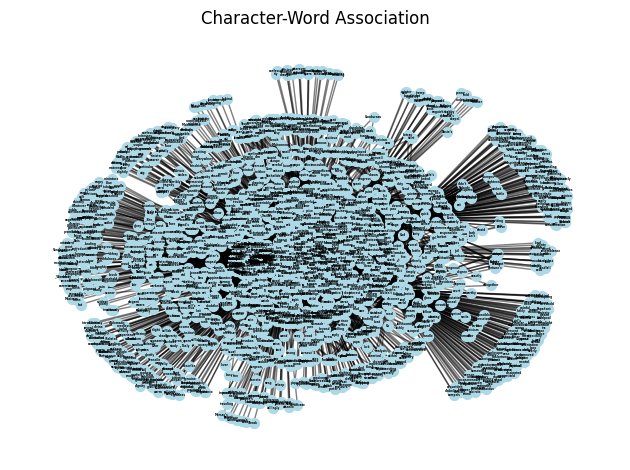

In [ ]:
#visualize the characters with their top words with which they are associated 
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()
#exam=["Goriot", "Delphine","Anastasie"]
# Add nodes for characters
for character in top:
    graph.add_node(character)

# Add edges between characters and words
for character, word_frequencies in character_word_frequencies.items():
    for word, frequency in word_frequencies:
        graph.add_edge(character, word, weight=frequency)

# Set layout for the graph
pos = nx.spring_layout(graph)

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)

# Draw edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=2, font_weight='bold')

# Adjust plot settings
plt.axis('off')
plt.title('Character-Word Association')
plt.tight_layout()

# Display the graph
plt.show()

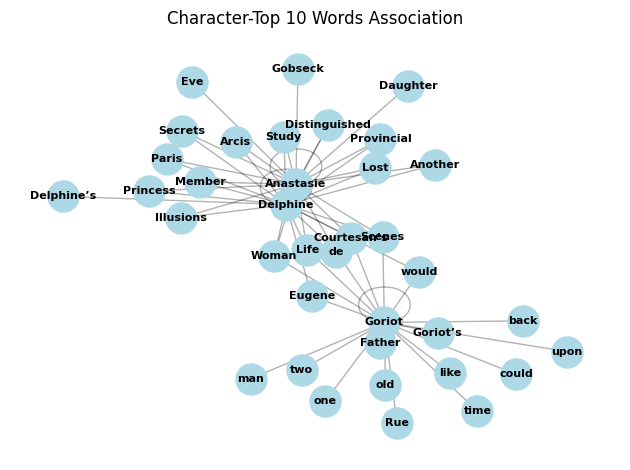

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()

# Specify the characters to include
characters = ["Goriot", "Delphine", "Anastasie"]

# Add nodes for selected characters
for character in characters:
    graph.add_node(character)

# Add edges between characters and top 10 words
for character, word_frequencies in character_word_frequencies.items():
    if character in characters:
        top_words = word_frequencies[:20]  # Select top 20 words
        for word, frequency in top_words:
            graph.add_edge(character, word, weight=frequency)

# Set layout for the graph
pos = nx.spring_layout(graph)

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)

# Draw edges
nx.draw_networkx_edges(graph, pos, alpha=0.3)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold')

# Adjust plot settings
plt.axis('off')
plt.title('Character-Top 10 Words Association')
plt.tight_layout()

# Display the graph
plt.show()


# Topic Modelling

In [184]:
#topic modeling
from gensim import corpora, models
dictionary = corpora.Dictionary([lemmatized_tokens])
corpus = [dictionary.doc2bow(lemmatized_tokens)]
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=30,iterations=400)
topics = lda_model.print_topics(num_topics=4, num_words=5)
for topic in topics:
    print(topic)
#FUTURE work,optimize the number of topics

(0, '0.000*"make" + 0.000*"Eugene" + 0.000*"would" + 0.000*"man" + 0.000*"look"')
(1, '0.000*"man" + 0.000*"Eugene" + 0.000*"like" + 0.000*"would" + 0.000*"make"')
(2, '0.009*"Eugene" + 0.007*"would" + 0.007*"make" + 0.007*"man" + 0.006*"Goriot"')
(3, '0.000*"Eugene" + 0.000*"would" + 0.000*"man" + 0.000*"make" + 0.000*"Goriot"')


In [186]:
from nltk import ngrams
n = 2
bigrams_list = list(ngrams(lemmatized_tokens, n))
bigrams_strings = [' '.join(gram) for gram in bigrams_list]
dictionary = corpora.Dictionary([bigrams_strings])
corpus = [dictionary.doc2bow(bigrams_strings)]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=30, iterations=400)

# Print the topics
topics = lda_model.print_topics(num_topics=4, num_words=10)
for topic in topics:
    print(topic)

(0, '0.000*"Father Goriot" + 0.000*"thousand franc" + 0.000*"old man" + 0.000*"Mlle Michonneau" + 0.000*"young man" + 0.000*"electronic work" + 0.000*"law student" + 0.000*"Maison Vauquer" + 0.000*"hundred franc" + 0.000*"franc year"')
(1, '0.002*"Father Goriot" + 0.001*"old man" + 0.001*"thousand franc" + 0.001*"Mlle Michonneau" + 0.001*"young man" + 0.001*"hundred franc" + 0.001*"law student" + 0.000*"electronic work" + 0.000*"Maison Vauquer" + 0.000*"hundred thousand"')
(2, '0.000*"Father Goriot" + 0.000*"thousand franc" + 0.000*"old man" + 0.000*"Mlle Michonneau" + 0.000*"hundred franc" + 0.000*"young man" + 0.000*"law student" + 0.000*"electronic work" + 0.000*"Maison Vauquer" + 0.000*"Sainte Genevieve"')
(3, '0.000*"Father Goriot" + 0.000*"old man" + 0.000*"thousand franc" + 0.000*"young man" + 0.000*"Mlle Michonneau" + 0.000*"law student" + 0.000*"hundred franc" + 0.000*"electronic work" + 0.000*"hundred thousand" + 0.000*"lodge house"')


In [170]:
from nltk import ngrams
n = 2
bigrams_list = list(ngrams(lemmatized_tokens, n))
bigrams_strings = [' '.join(gram) for gram in bigrams_list]
dictionary = corpora.Dictionary([bigrams_strings])
corpus = [dictionary.doc2bow(bigrams_strings)]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=7, id2word=dictionary, passes=100, iterations=10)

# Print the topics
topics = lda_model.print_topics(num_topics=7, num_words=10)
for topic in topics:
    print(topic)

(0, '0.003*"Father Goriot" + 0.001*"old man" + 0.001*"thousand franc" + 0.001*"Mlle Michonneau" + 0.001*"young man" + 0.001*"hundred franc" + 0.001*"law student" + 0.001*"electronic work" + 0.000*"Maison Vauquer" + 0.000*"hundred thousand"')
(1, '0.000*"Father Goriot" + 0.000*"old man" + 0.000*"young man" + 0.000*"Mlle Michonneau" + 0.000*"thousand franc" + 0.000*"hundred franc" + 0.000*"first time" + 0.000*"young men" + 0.000*"Sainte Genevieve" + 0.000*"law student"')
(2, '0.000*"Father Goriot" + 0.000*"thousand franc" + 0.000*"old man" + 0.000*"young man" + 0.000*"Mlle Michonneau" + 0.000*"hundred franc" + 0.000*"electronic work" + 0.000*"law student" + 0.000*"Maison Vauquer" + 0.000*"five franc"')
(3, '0.000*"Father Goriot" + 0.000*"old man" + 0.000*"thousand franc" + 0.000*"Mlle Michonneau" + 0.000*"young man" + 0.000*"sit room" + 0.000*"law student" + 0.000*"Sainte Genevieve" + 0.000*"five franc" + 0.000*"young men"')
(4, '0.000*"Father Goriot" + 0.000*"thousand franc" + 0.000*"yo

In [171]:
from nltk import ngrams
n = 3
trigrams_list = list(ngrams(lemmatized_tokens, n))
trigrams_strings = [' '.join(gram) for gram in trigrams_list]
dictionary = corpora.Dictionary([trigrams_strings])
corpus = [dictionary.doc2bow(trigrams_strings)]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=30, iterations=400)

# Print the topics
topics = lda_model.print_topics(num_topics=4, num_words=10)
for topic in topics:
    print(topic)

(0, '0.000*"hundred thousand franc" + 0.000*"Literary Archive Foundation" + 0.000*"Scenes Courtesan Life" + 0.000*"twelve thousand franc" + 0.000*"hundred franc year" + 0.000*"twelve hundred franc" + 0.000*"six thousand franc" + 0.000*"Rue Neuve Sainte" + 0.000*"Rue Nueve Sainte" + 0.000*"thousand franc year"')
(1, '0.000*"hundred thousand franc" + 0.000*"Literary Archive Foundation" + 0.000*"Nueve Sainte Genevieve" + 0.000*"twelve thousand franc" + 0.000*"Scenes Courtesan Life" + 0.000*"thousand franc year" + 0.000*"Neuve Sainte Genevieve" + 0.000*"six thousand franc" + 0.000*"twelve hundred franc" + 0.000*"Faubourg Saint Germain"')
(2, '0.000*"Literary Archive Foundation" + 0.000*"hundred thousand franc" + 0.000*"Scenes Courtesan Life" + 0.000*"twelve thousand franc" + 0.000*"Rue Nueve Sainte" + 0.000*"twelve hundred franc" + 0.000*"thousand franc year" + 0.000*"Rue Neuve Sainte" + 0.000*"hundred franc year" + 0.000*"Neuve Sainte Genevieve"')
(3, '0.000*"hundred thousand franc" + 0.0

# Event Detection-Subject object Relationship

In [188]:
#subject object relationships SOS some of the outputs have words such as violent,kill,death,vanity,love,heart,tears,pain,poverty,misfortune with named entities SOSOSOSOS
from nltk.chunk import RegexpParser
# Preprocess each sentence
preprocessed_sentences = []
for sentence in filtered_sentences:
    # Tokenize the sentence into words
    words = tokenizer.tokenize(sentence)
    stopword_list = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stopword_list]
    
    # Perform part-of-speech tagging
    tagged_words = nltk.pos_tag(words)
    
    # Perform named entity recognition
    named_entities = nltk.ne_chunk(tagged_words)
    
    # Append the preprocessed sentence to the list
    preprocessed_sentences.append(named_entities)

# Perform chunking and extract relationships
relationships = []
for sentence in preprocessed_sentences:
    chunk_parser = RegexpParser('''
        NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
        VP: {<VB.*><NP|PP>*}  # Chunk verb phrases
    ''')
    tree = chunk_parser.parse(sentence)
    for subtree in tree.subtrees():
        if subtree.label() == 'VP' and len(subtree) >= 2:
            # Get the verb and its direct object
            verb = subtree[0][0]
            direct_object = subtree[1][0]
            
            # Find the subject of the verb
            for s in tree.subtrees(lambda t: t.label() == 'NP' and t != subtree):
                subject = ' '.join(word for word, pos in s.leaves())
                
                # Store the relationship
                relationships.append((subject, verb, direct_object))

# Print the relationships
for subject, verb, direct_object in relationships:
    print(f"{subject} --{verb}--> {direct_object}")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
figures --took--> ('bill', 'NN')
regular bill twelve --took--> ('bill', 'NN')
francs --took--> ('bill', 'NN')
order --took--> ('bill', 'NN')
neighbor room --took--> ('bill', 'NN')
bill bore --saw--> ('stamp', 'NN')
signature --saw--> ('stamp', 'NN')
stamp --saw--> ('stamp', 'NN')
sum --saw--> ('stamp', 'NN')
figures --saw--> ('stamp', 'NN')
regular bill twelve --saw--> ('stamp', 'NN')
francs --saw--> ('stamp', 'NN')
order --saw--> ('stamp', 'NN')
neighbor room --saw--> ('stamp', 'NN')
bill bore --altered--> ('figures', 'NNS')
signature --altered--> ('figures', 'NNS')
stamp --altered--> ('figures', 'NNS')
sum --altered--> ('figures', 'NNS')
figures --altered--> ('figures', 'NNS')
regular bill twelve --altered--> ('figures', 'NNS')
francs --altered--> ('figures', 'NNS')
order --altered--> ('figures', 'NNS')
neighbor room --altered--> ('figures', 'NNS')
bill bore --made--> ('regular', 'JJ')
signature --made--> ('regular', 'JJ')
stamp 

In [189]:
###identifying events related to the following words of interest

# Define the words of interest
words_of_interest = ['violent', 'kill', 'death', 'vanity', 'love', 'heart', 'tears', 'pain', 'poverty', 'misfortune']

# Perform chunking and extract relationships
events = []
for sentence in preprocessed_sentences:
    chunk_parser = RegexpParser('''
        NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
        VP: {<VB.*><NP|PP>*}  # Chunk verb phrases
    ''')
    tree = chunk_parser.parse(sentence)
    for subtree in tree.subtrees():
        if subtree.label() == 'VP' and len(subtree) >= 2:
            # Get the verb and its direct object
            verb = subtree[0]
            direct_object = subtree[1]
            
            # Find the subject of the verb
            for s in tree.subtrees(lambda t: t.label() == 'NP' and t != subtree):
                subject_words = [word for word, pos in s.leaves()]
                subject = ' '.join(subject_words)
                
                # Check if the subject, verb, or direct object contains any word of interest
                if any(word in [subject] + [word for word in subject_words] or word in verb[0] or word in direct_object[0] for word in words_of_interest):
                    # Store the event
                    events.append((subject, verb[0], direct_object[0]))

# Print the events
for subject, verb, direct_object in events:
    print(f"{subject} --{verb}--> {direct_object}")
###  we observe sentences such as fathers love

sense word tears --overworked--> ('twisted', 'JJ')
sense word tears --service--> ('story', 'NN')
sense word tears --restricted--> ('sense', 'NN')
sense word tears --shed--> ('_intra', 'NNP')
progress heart --lie--> ('course', 'NN')
progress heart --continues--> ('course', 'NN')
poverty dullness --straying--> ('suburb', 'NN')
poverty dullness --lodging--> ('houses', 'NNS')
suburb --see--> ('poverty', 'JJ')
houses --see--> ('poverty', 'JJ')
public institutions --see--> ('poverty', 'JJ')
poverty dullness --see--> ('poverty', 'JJ')
old age --see--> ('poverty', 'JJ')
joyous youth --see--> ('poverty', 'JJ')
drudgery --see--> ('poverty', 'JJ')
poverty dullness --die--> ('joyous', 'JJ')
poverty dullness --condemned--> ('drudgery', 'NN')
lime trees --painted--> ('garden', 'NN')
garden seats --painted--> ('garden', 'NN')
table hither dog days lodgers --painted--> ('garden', 'NN')
indulge cup coffee --painted--> ('garden', 'NN')
pleasure --painted--> ('garden', 'NN')
hot enough roast eggs --paint

In [190]:
#Event detection
from nltk.chunk import RegexpParser
import nltk

def extract_events(sentences):
    events = []
    for sentence in sentences:
        # Tokenize the sentence into words
        words = nltk.word_tokenize(sentence)
        
        # Perform part-of-speech tagging
        tagged_words = nltk.pos_tag(words)
        
        # Perform named entity recognition
        named_entities = nltk.ne_chunk(tagged_words)
        
        # Chunking and extract relationships
        chunk_parser = RegexpParser('''
            NP: {<DT>?<JJ>*<NN.*>+}  # Chunk noun phrases
            VP: {<VB.*><NP|PP>*}  # Chunk verb phrases
        ''')
        tree = chunk_parser.parse(named_entities)
        
        for subtree in tree.subtrees():
            if subtree.label() == 'VP' and len(subtree) >= 2:
                # Get the verb and its direct object
                verb = subtree[0][0]
                direct_object = subtree[1][0]
                
                # Find the subject of the verb
                for s in tree.subtrees(lambda t: t.label() == 'NP' and t != subtree):
                    subject = ' '.join(word for word, pos in s.leaves())
                    
                    # Store the event
                    events.append((subject, verb, direct_object))
    
    return events

extracted_events = extract_events(sentences)

# Print the extracted events
for subject, verb, direct_object in extracted_events:
    print(f"{subject} --{verb}--> {direct_object}")


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
clock. ” “ Madame --’--> ('clock.', 'JJ')
” “ Quick --’--> ('clock.', 'JJ')
word --darting--> ('dressing-room', 'JJ')
” --darting--> ('dressing-room', 'JJ')
dressing-room necklace --darting--> ('dressing-room', 'JJ')
rooms --went--> ('rooms', 'NNS')
world --needs--> ('sink', 'NN')
ocean mud --needs--> ('sink', 'NN')
set foot --needs--> ('sink', 'NN')
black mire --needs--> ('sink', 'NN')
sink chin --needs--> ('sink', 'NN')
greater. ” --seen--> ('society', 'NN')
society --seen--> ('society', 'NN')
great phases --seen--> ('society', 'NN')
Obedience --seen--> ('society', 'NN')
choice --seen--> ('society', 'NN')
greater. ” --hesitated--> ('choice', 'NN')
society --hesitated--> ('choice', 'NN')
great phases --hesitated--> ('choice', 'NN')
Obedience --hesitated--> ('choice', 'NN')
choice --hesitated--> ('choice', 'NN')
quiet uneventful life --thought--> ('quiet', 'JJ')
pure happiness days --thought--> ('quiet', 'JJ')
beings --beloved--> (

In [191]:
extracted_events

[('Marriage', 'works', ('genius', 'NN')),
 ('Saint-Hilaire', 'works', ('genius', 'NN')),
 ('token admiration', 'works', ('genius', 'NN')),
 ('genius', 'works', ('genius', 'NN')),
 ('house', 'known', ('neighborhood', 'NN')),
 ('neighborhood', 'known', ('neighborhood', 'NN')),
 ('men women', 'known', ('neighborhood', 'NN')),
 ('word', 'known', ('neighborhood', 'NN')),
 ('respectable establishment', 'known', ('neighborhood', 'NN')),
 ('time', 'known', ('neighborhood', 'NN')),
 ('matter fact', 'known', ('neighborhood', 'NN')),
 ('young woman', 'known', ('neighborhood', 'NN')),
 ('roof thirty years', 'known', ('neighborhood', 'NN')),
 ('young man', 'known', ('neighborhood', 'NN')),
 ('length time', 'known', ('neighborhood', 'NN')),
 ('sure sign allowance', 'known', ('neighborhood', 'NN')),
 ('house', 'receives', ('men', 'NNS')),
 ('neighborhood', 'receives', ('men', 'NNS')),
 ('men women', 'receives', ('men', 'NNS')),
 ('word', 'receives', ('men', 'NNS')),
 ('respectable establishment', 're

# Co-occurrence

In [192]:
#co occurence
co_occurrence_matrix = {}

for sentence in preprocessed_sentences:
    for i in range(len(sentence)):
        for j in range(i+1, len(sentence)):
            word1 = sentence[i]
            word2 = sentence[j]
            
            # Check if both words are entities or other relevant criteria
            if isinstance(word1, nltk.Tree) or isinstance(word2, nltk.Tree):
                continue
            
            if word1 not in co_occurrence_matrix:
                co_occurrence_matrix[word1] = {}
            if word2 not in co_occurrence_matrix:
                co_occurrence_matrix[word2] = {}
            
            if word2 not in co_occurrence_matrix[word1]:
                co_occurrence_matrix[word1][word2] = 1
            else:
                co_occurrence_matrix[word1][word2] += 1
            
            if word1 not in co_occurrence_matrix[word2]:
                co_occurrence_matrix[word2][word1] = 1
            else:
                co_occurrence_matrix[word2][word1] += 1
threshold = 10

# Print meaningful connections
for word, connections in co_occurrence_matrix.items():
    sorted_connections = sorted(connections.items(), key=lambda x: x[1], reverse=True)
    meaningful_connections = [connection[0] for connection in sorted_connections if connection[1] >= threshold]
    
    if len(meaningful_connections) > 0:
        print(f"{word}: {meaningful_connections}")

('great', 'JJ'): [('one', 'CD'), ('young', 'JJ'), ('man', 'NN')]
('works', 'VBZ'): [('tm', 'NN')]
('de', 'FW'): [('de', 'FW'), ('Woman', 'NNP'), ('Study', 'NNP'), ('Member', 'NNP'), ('Provincial', 'NNP'), ('Another', 'DT'), ('de', 'IN'), ('Government', 'NNP'), ('Beauseant', 'NNP'), ('Clerks', 'NNP'), ('Thirteen', 'NNP'), ('one', 'CD'), ('Lost', 'NNP'), ('Illusions', 'NNP'), ('Distinguished', 'NNP'), ('Two', 'CD'), ('Brides', 'NNP'), ('Unconscious', 'NNP'), ('Humorists', 'NNP'), ('editions', 'NNS'), ('Restaud', 'NNP'), ('Nucingen', 'NNP'), ('would', 'MD'), ('said', 'VBD'), ('Langeais', 'NNP'), ('Vicomtesse', 'NNP'), ('old', 'JJ'), ('police', 'NN'), ('found', 'VBD'), ('secret', 'JJ'), ('Commission', 'NNP'), ('Lunacy', 'NNP'), ('Letters', 'NNP'), ('Imaginary', 'NNP'), ('Mistress', 'NNP'), ('Classes', 'NNP'), ('addition', 'NN'), ('narrated', 'VBD'), ('following', 'VBG'), ('La', 'NNP'), ('Grande', 'NNP'), ('Breteche', 'NNP'), ('Bibi', 'NNP'), ('Lupin', 'NNP'), ('chief', 'NN'), ('called', 'V

In [193]:
#co occurence of named entities
lowercase_tokens = [token.lower() for token in lemmatized_tokens]

co_occurrence = {}
for named_entity in top:
    named_entity = named_entity.lower()
    if named_entity in lowercase_tokens:
        index = lowercase_tokens.index(named_entity)
        context_words = lowercase_tokens[max(0, index - 5):index] + lowercase_tokens[index + 1:index + 6]
        co_occurrence[named_entity] = context_words

# Print the co-occurrence of named entities with other words
for named_entity, context_words in co_occurrence.items():
    print(named_entity, ":", context_words)


eugene : ['hundred', 'franc', 'year', 'misfortune', 'accustom', 'rastignac', 'name', 'work', 'belong', 'number']
vautrin : ['whisker', 'give', 'retire', 'merchant', 'address', 'two', 'four', 'room', 'third', 'floor']
rastignac : ['franc', 'year', 'misfortune', 'accustom', 'eugene', 'name', 'work', 'belong', 'number', 'young']
goriot : ['father', 'honore', 'balzac', 'translated', 'ellen', 'marriage']
bianchon : ['melancholy', 'dinner', 'ready', 'cry', 'horace', 'medical', 'student', 'friend', 'rastignac', 'stomach']
vauquer : ['work', 'genius', 'balzac', 'father', 'goriot', '_nee_', 'conflans', 'elderly', 'person', 'past']
sylvie : ['nobody', 'wont', 'every', 'possible', 'misfortune', 'stout', 'cook', 'hear', 'mistress', 'shuffle']
restaud : ['young', 'man', 'fancy', 'comtesse', 'anastasie', 'tall', 'gracefully', 'make', 'prettiest', 'figure']
delphine : ['turn', 'langeais', 'baron', 'nucingen', 'name', 'fair', 'haired', 'woman', 'side', 'box']
poiret : ['respectively', 'occupy', 'old',

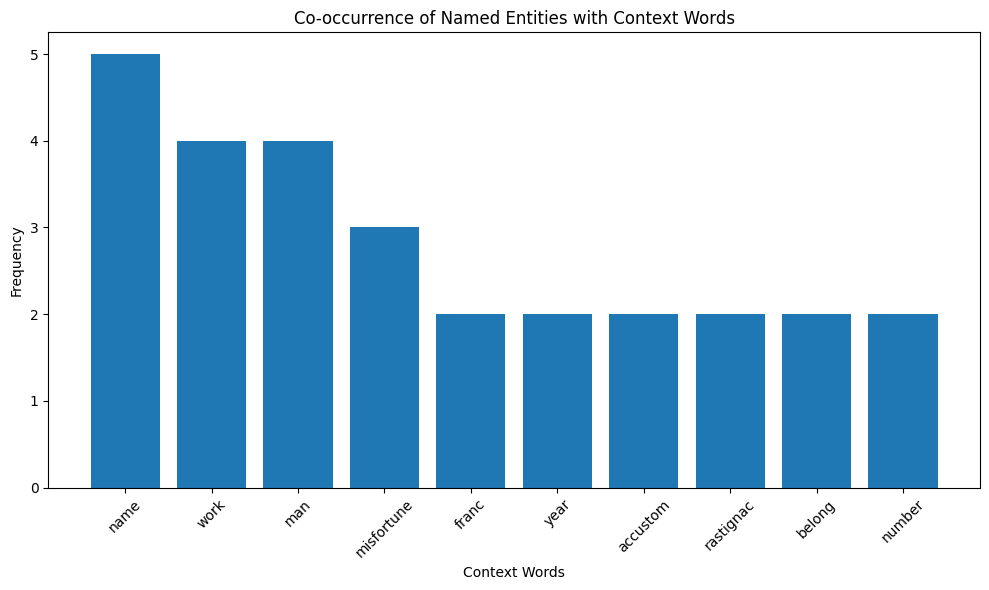

In [194]:
import matplotlib.pyplot as plt

# Count the frequency of each context word
word_counts = {}
for named_entity, context_words in co_occurrence.items():
    for word in context_words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Sort the context words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their frequencies
top_words = [word for word, count in sorted_words[:10]]
word_frequencies = [count for word, count in sorted_words[:10]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_words)), word_frequencies)
plt.xlabel('Context Words')
plt.ylabel('Frequency')
plt.xticks(range(len(top_words)), top_words, rotation=45)
plt.title('Co-occurrence of Named Entities with Context Words')
plt.tight_layout()
plt.show()


In [ ]:
#future work ..find family relationships

In [ ]:
#extract sentences that satisfy some family relation patterns
import re

# Define the patterns for family relations
patterns = [
    r"\b(daughter|son|father|mother)\b",
    r"\b(husband|wife) of\b"
]

for sentence in sentences:
    for pattern in patterns:
        match = re.search(pattern, sentence)
        if match:
            print(sentence)
            break


The subject between the two windows is the banquet given by
Calypso to the son of Ulysses, displayed thereon for the admiration of
the boarders, and has furnished jokes these forty years to the young
men who show themselves superior to their position by making fun of the
dinners to which poverty condemns them.
With her lived Victorine Taillefer, a schoolgirl, to whom
she filled the place of mother.
Her father was persuaded that
he had sufficient reason for declining to acknowledge her, and allowed
her a bare six hundred francs a year; he had further taken measures
to disinherit his daughter, and had converted all his real estate into
personalty, that he might leave it undivided to his son.
Victorine’s
mother had died broken-hearted in Mme.
The poor child loved the father who refused to
acknowledge her.
Once every year she tried to see him to deliver her
mother’s message of forgiveness, but every year hitherto she had knocked
at that door in vain; her father was inexorable.
Her brother,